In [1]:
! pip install -U scikit-learn

print ("\n~~ done installing ~~\n")

from __future__ import division
import warnings

from math import log
import numpy as np

from scipy.optimize import fmin_bfgs
from sklearn.preprocessing import LabelEncoder

print ("\n~~ done importing~~\n")


Requirement already up-to-date: scikit-learn in c:\users\moideenj\appdata\local\continuum\anaconda2\lib\site-packages

~~ done installing ~~


~~ done importing~~



In [2]:
# load modules
from __future__ import division
import pandas as pd
pd.set_option('precision', 3)
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.calibration import CalibratedClassifierCV
import seaborn as sns
from scipy import interp
import bisect
from scipy.stats import mstats
#from churn_measurements import calibration, discrimination


In [3]:
df = pd.read_csv('C:/Users/MoideenJ/Desktop/TelcoChurn/Input Churn Data/AcIc_Data_Sep_with ARPU-18 Nov_version16 - Curated.csv', header=0)
#df = pd.read_csv('C:/Users/MoideenJ/Desktop/TelcoChurn/Input Churn Data/churn.csv',low_memory=False, header=0)

print ("~~ Read Input Data ~~")

~~ Read Input Data ~~


In [4]:
col_names = df.columns.tolist()
print ("\n Feature Column Names:\n")
print (col_names)


 Feature Column Names:

['NATIONALITY', 'CAL_TENURE', 'HOME_CELLSITEID', 'VF_NUMBER', 'POSTPAID_PLAN', 'ARPU_TOTAL', 'AMPU', 'ARPU_OG', 'ARPU_IC', 'NO_DAYS_WITH_INTL_OG', 'NO_DAYS_WITH_IC', 'NO_DAYS_WITH_DATA', 'DATA_PLAN', 'DATA_MB', 'CALLS_INTL_IC', 'CALLS_INTL_OG', 'CALLS_TOTAL_IC', 'CALLS_TOTAL_MOB_OG', 'EVENING_MINS_INTL_OG', 'EVENING_MINS_ON_NET_FIX_OG', 'EVENING_MINS_ON_NET_MOB_OG', 'EVENING_MINS_X_NET_FIX_OG', 'EVENING_MINS_X_NET_MOB_OG', 'EXPIRED_BALANCE', 'EXPIRED_DATA', 'EXPIRED_MINUTES', 'EXPIRED_SMS', 'MID_NIGHT_MINS_INTL_OG', 'MID_NIGHT_MINS_ON_NET_FIX_OG', 'MID_NIGHT_MINS_ON_NET_MOB_OG', 'MID_NIGHT_MINS_X_NET_FIX_OG', 'MID_NIGHT_MINS_X_NET_MOB_OG', 'MINS_INTL_IC', 'MINS_INTL_OG', 'MINS_TOTAL_IC', 'MINS_TOTAL_OG', 'MORNING_MINS_INTL_OG', 'MORNING_MINS_ON_NET_FIX_OG', 'MORNING_MINS_ON_NET_MOB_OG', 'MORNING_MINS_X_NET_FIX_OG', 'MORNING_MINS_X_NET_MOB_OG', 'REVENUE_INTL_IC', 'REVENUE_INTL_OG', 'REVENUE_ON_NET_FIX_OG', 'REVENUE_ON_NET_MOB_OG', 'REVENUE_X_NET_FIX_IC', 'REVENU

In [5]:
to_show = col_names[:10] + col_names[-10:]
print ('\n Sample Input Data:')
df[to_show].head(10)


 Sample Input Data:


,NATIONALITY,CAL_TENURE,HOME_CELLSITEID,VF_NUMBER,POSTPAID_PLAN,ARPU_TOTAL,AMPU,ARPU_OG,ARPU_IC,NO_DAYS_WITH_INTL_OG,MAX_DAYS_IC,NO_DAYS_WITH_OG,NO_DAYS_WITH_ON_NET_FIX_OG,NO_DAYS_WITH_ON_NET_OG,NO_DAYS_WITH_ON_NET_MOB_OG,NO_DAYS_WITH_X_NET_MOB_OG,NO_DAYS_WITH_X_NET_OG,NO_DAYS_WITH_X_NET_FIX_OG,NO_DAYS_WITH_ICC_INTL_OG,HAS_CHURNED
0,Sri Lankan,8,IBS0351,97474467595,Yes,50.73,50.73,0.7,0.03,0,29,1,0,1,1,0,0,0,0,Yes
1,Indian,1,Site1083,97477265360,Yes,120.55,102.99,0.0,0.55,21,22,24,0,11,11,14,14,0,0,Yes
2,Employee,82,IBS0351,97430096977,Yes,65.34,45.73,0.0,0.34,2,28,2,0,2,2,2,2,0,0,Yes
3,UAE (United Arab Emirates),7,IBS0351,97455546272,Yes,253.34,192.72,9.6,18.74,9,1,29,0,23,23,29,29,16,0,Yes
4,Egyptian,31,IBS0361,97470318989,Yes,162.66,111.87,0.0,12.66,8,8,26,0,24,24,17,17,0,0,Yes
5,UAE (United Arab Emirates),16,IBS0360,97431481387,Yes,99.48,86.15,0.0,9.48,0,23,9,0,4,4,7,8,2,0,Yes
6,Qatari,1,NaN,97470990997,Yes,1016.00,1014.97,16.0,0.00,0,0,1,0,0,0,0,0,0,0,Yes
7,Employee,42,Site1131,97430335926,Yes,82.20,73.53,0.0,7.20,0,3,26,0,26,26,16,17,4,0,Yes
8,Indian,3,Site1108,97470345529,Yes,50.00,50.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,Yes
9,UAE (United Arab Emirates),5,NaN,97470476843,Yes,500.00,500.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,Yes


In [6]:
print ("\n~~ Input Data Summary ~~\n")
print (df.shape)
print (df.dtypes)


~~ Input Data Summary ~~

(31752, 103)
NATIONALITY                      object
CAL_TENURE                        int64
HOME_CELLSITEID                  object
VF_NUMBER                         int64
POSTPAID_PLAN                    object
ARPU_TOTAL                      float64
AMPU                            float64
ARPU_OG                         float64
ARPU_IC                         float64
NO_DAYS_WITH_INTL_OG              int64
NO_DAYS_WITH_IC                   int64
NO_DAYS_WITH_DATA                 int64
DATA_PLAN                        object
DATA_MB                         float64
CALLS_INTL_IC                     int64
CALLS_INTL_OG                     int64
CALLS_TOTAL_IC                    int64
CALLS_TOTAL_MOB_OG                int64
EVENING_MINS_INTL_OG              int64
EVENING_MINS_ON_NET_FIX_OG        int64
EVENING_MINS_ON_NET_MOB_OG        int64
EVENING_MINS_X_NET_FIX_OG         int64
EVENING_MINS_X_NET_MOB_OG         int64
EXPIRED_BALANCE                   int64


In [7]:
# The number of numeric data
len(df.select_dtypes(include=['int64','float64']).columns)

95

In [8]:
# The number of categorical data
len(df.select_dtypes(include=['category','object']).columns)

8

In [9]:
# Check there is any missing data
for i in df.columns.tolist():
    k = sum(pd.isnull(df[i]))
    print (i, k)

('NATIONALITY', 0)
('CAL_TENURE', 0)
('HOME_CELLSITEID', 3073)
('VF_NUMBER', 0)
('POSTPAID_PLAN', 0)
('ARPU_TOTAL', 0)
('AMPU', 0)
('ARPU_OG', 0)
('ARPU_IC', 0)
('NO_DAYS_WITH_INTL_OG', 0)
('NO_DAYS_WITH_IC', 0)
('NO_DAYS_WITH_DATA', 0)
('DATA_PLAN', 0)
('DATA_MB', 0)
('CALLS_INTL_IC', 0)
('CALLS_INTL_OG', 0)
('CALLS_TOTAL_IC', 0)
('CALLS_TOTAL_MOB_OG', 0)
('EVENING_MINS_INTL_OG', 0)
('EVENING_MINS_ON_NET_FIX_OG', 0)
('EVENING_MINS_ON_NET_MOB_OG', 0)
('EVENING_MINS_X_NET_FIX_OG', 0)
('EVENING_MINS_X_NET_MOB_OG', 0)
('EXPIRED_BALANCE', 0)
('EXPIRED_DATA', 0)
('EXPIRED_MINUTES', 0)
('EXPIRED_SMS', 0)
('MID_NIGHT_MINS_INTL_OG', 0)
('MID_NIGHT_MINS_ON_NET_FIX_OG', 0)
('MID_NIGHT_MINS_ON_NET_MOB_OG', 0)
('MID_NIGHT_MINS_X_NET_FIX_OG', 0)
('MID_NIGHT_MINS_X_NET_MOB_OG', 0)
('MINS_INTL_IC', 0)
('MINS_INTL_OG', 0)
('MINS_TOTAL_IC', 0)
('MINS_TOTAL_OG', 0)
('MORNING_MINS_INTL_OG', 0)
('MORNING_MINS_ON_NET_FIX_OG', 0)
('MORNING_MINS_ON_NET_MOB_OG', 0)
('MORNING_MINS_X_NET_FIX_OG', 0)
('MORNING_M

In [10]:
print "~ Exploring Data ~"
# numeric data
#print df.describe()
# same as above
print df.describe(include=['int64','float64'])

~ Exploring Data ~
       CAL_TENURE  VF_NUMBER  ARPU_TOTAL       AMPU    ARPU_OG    ARPU_IC  \
count   31752.000  3.175e+04   31752.000  31752.000  31752.000  31752.000   
mean       20.118  9.745e+10     188.328    148.643     11.670      7.052   
std        21.000  2.092e+07     191.636    171.711     96.213     20.876   
min         0.000  9.743e+10       0.000  -2860.660      0.000      0.000   
25%         4.000  9.743e+10      81.157     65.180      0.000      0.000   
50%        13.000  9.747e+10     132.900    100.000      0.000      1.110   
75%        29.000  9.747e+10     241.433    187.050      4.260      7.083   
max       100.000  9.748e+10   13419.700   7095.550  12770.630   1851.000   

       NO_DAYS_WITH_INTL_OG  NO_DAYS_WITH_IC  NO_DAYS_WITH_DATA    DATA_MB  \
count             31752.000        31752.000          31752.000  3.175e+04   
mean                  7.588           13.064             15.792  9.839e+03   
std                   9.505           11.692         

In [11]:
# categorical and object data
print df.describe(include=['category','object'])

       NATIONALITY HOME_CELLSITEID POSTPAID_PLAN DATA_PLAN  \
count        31752           28679         31752     31752   
unique         123            1005             1         2   
top         Indian         IBS0351           Yes        No   
freq          8580             916         31752     24914   

       TOP_CALLING_COUNTRY LAST_OG_DATE LAST_IC_DATE HAS_CHURNED  
count                21945        23378        23281       31752  
unique                 110           30           30           2  
top                    n/a   30/09/2017   30/09/2017          No  
freq                  6961        15508        14166       15876  


In [12]:
print df['HAS_CHURNED'].value_counts()

No     15876
Yes    15876
Name: HAS_CHURNED, dtype: int64


In [13]:
print df.groupby(df['HAS_CHURNED']).mean()

             CAL_TENURE  VF_NUMBER  ARPU_TOTAL     AMPU  ARPU_OG  ARPU_IC  \
HAS_CHURNED                                                                 
No               24.168  9.746e+10     195.944  151.691   10.714    9.377   
Yes              16.068  9.745e+10     180.713  145.595   12.627    4.727   

             NO_DAYS_WITH_INTL_OG  NO_DAYS_WITH_IC  NO_DAYS_WITH_DATA  \
HAS_CHURNED                                                             
No                          8.220           16.066             17.275   
Yes                         6.956           10.061             14.308   

              DATA_MB            ...             MAX_DAYS_DATA  MAX_DAYS_IC  \
HAS_CHURNED                      ...                                          
No           9915.090            ...                     9.212        8.329   
Yes          9763.316            ...                     9.303        9.536   

             NO_DAYS_WITH_OG  NO_DAYS_WITH_ON_NET_FIX_OG  \
HAS_CHURNED          

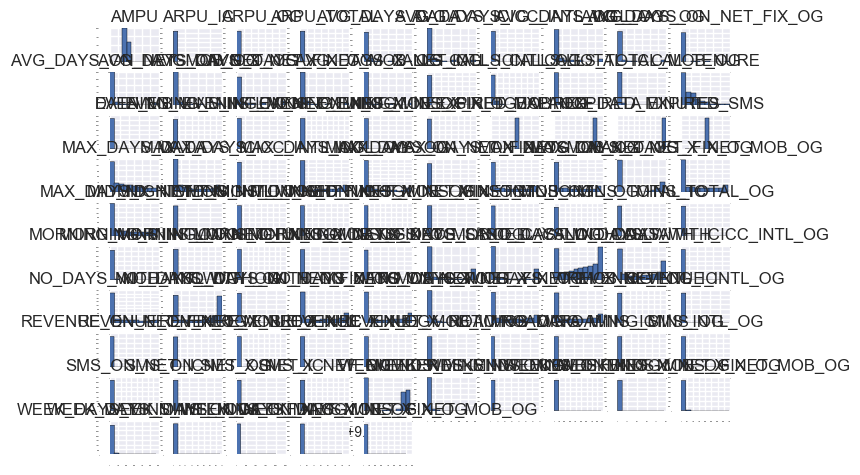

In [14]:
# Histogram
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

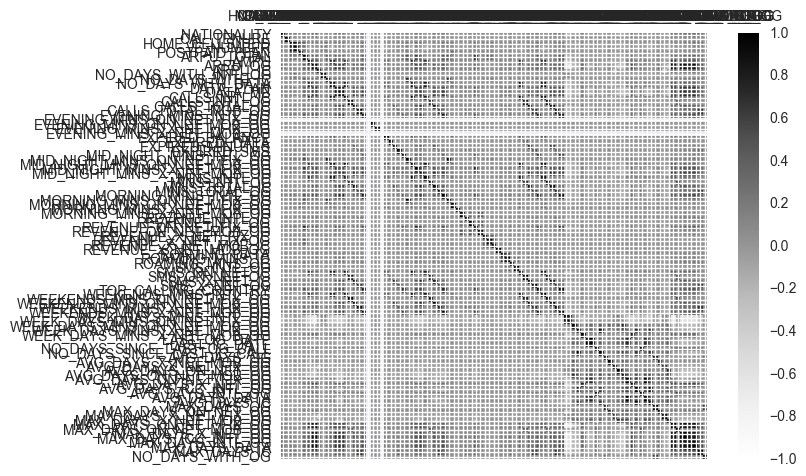

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0, len(df._get_numeric_data().columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(col_names)
ax.set_yticklabels(col_names)
plt.show()

In [16]:
print "~ Preparing Target and Features Data ~"

# Isolate target data
y = np.where(df['HAS_CHURNED']== 'Yes', 1, 0)

print(y)

print "~ Feature Converted to Boolean ~"

# 'yes'/'no' has to be converted to boolean values
# NumPy converts these from boolean to 1. and 0. later
# yes_no_cols will be re-used for later scoring
yes_no_cols = ["DATA_PLAN"]
df[yes_no_cols] = df[yes_no_cols] == 'yes'

# We don't need these columns
to_drop = [
           'NATIONALITY','VF_NUMBER','DATA_PLAN','POSTPAID_PLAN','HOME_CELLSITEID','TOP_CALLING_COUNTRY',
           'HAS_CHURNED','LAST_IC_DATE','LAST_OG_DATE','EVENING_MINS_INTL_OG','EVENING_MINS_ON_NET_FIX_OG',
           'EVENING_MINS_ON_NET_MOB_OG','EVENING_MINS_X_NET_FIX_OG','EVENING_MINS_INTL_OG',
           'EVENING_MINS_ON_NET_FIX_OG','EVENING_MINS_ON_NET_MOB_OG','EVENING_MINS_X_NET_FIX_OG',
           'EXPIRED_MINUTES','EVENING_MINS_X_NET_MOB_OG','EVENING_MINS_X_NET_MOB_OG','MID_NIGHT_MINS_INTL_OG',
           'EXPIRED_DATA','EXPIRED_SMS','MID_NIGHT_MINS_ON_NET_FIX_OG','MID_NIGHT_MINS_ON_NET_MOB_OG',
           'MID_NIGHT_MINS_X_NET_FIX_OG','MID_NIGHT_MINS_X_NET_MOB_OG','EXPIRED_BALANCE'
          ]
df = df.drop(to_drop, axis=1)



print "~ Dropped Coulumns ~"


# Pull out fesatures for later scoring
features = df.columns
print(features)

print "~ Feature Variable ~"


# feature variables
X = df.as_matrix().astype(np.float)

print ("\n~~ Input Data Summary ~~\n")
print (df.shape)
print (df.dtypes)

~ Preparing Target and Features Data ~
[1 1 1 ..., 0 0 0]
~ Feature Converted to Boolean ~
~ Dropped Coulumns ~
Index([u'CAL_TENURE', u'ARPU_TOTAL', u'AMPU', u'ARPU_OG', u'ARPU_IC',
       u'NO_DAYS_WITH_INTL_OG', u'NO_DAYS_WITH_IC', u'NO_DAYS_WITH_DATA',
       u'DATA_MB', u'CALLS_INTL_IC', u'CALLS_INTL_OG', u'CALLS_TOTAL_IC',
       u'CALLS_TOTAL_MOB_OG', u'MINS_INTL_IC', u'MINS_INTL_OG',
       u'MINS_TOTAL_IC', u'MINS_TOTAL_OG', u'MORNING_MINS_INTL_OG',
       u'MORNING_MINS_ON_NET_FIX_OG', u'MORNING_MINS_ON_NET_MOB_OG',
       u'MORNING_MINS_X_NET_FIX_OG', u'MORNING_MINS_X_NET_MOB_OG',
       u'REVENUE_INTL_IC', u'REVENUE_INTL_OG', u'REVENUE_ON_NET_FIX_OG',
       u'REVENUE_ON_NET_MOB_OG', u'REVENUE_X_NET_FIX_IC',
       u'REVENUE_X_NET_FIX_OG', u'REVENUE_X_NET_MOB_IC',
       u'REVENUE_X_NET_MOB_OG', u'ROAMING_DATA', u'ROAMING_MINS_IC',
       u'ROAMING_MINS_OG', u'SMS_INTL_OG', u'SMS_ON_NET_IC', u'SMS_ON_NET_OG',
       u'SMS_X_NET_IC', u'SMS_X_NET_OG', u'WEEKENDS_MINS_INTL_OG',

[1 1 1 ..., 0 1 0]


[[  55.    105.78   99.16 ...,   11.      7.      0.  ]
 [   9.    166.94  113.05 ...,   15.      1.      0.  ]
 [  69.    285.    285.   ...,    0.      0.      0.  ]
 ..., 
 [  53.    155.43  147.09 ...,   21.     17.      0.  ]
 [   1.    150.28   58.51 ...,    6.      0.      0.  ]
 [   3.     50.16   50.16 ...,    0.      0.      0.  ]]




[ 0.10446446  0.04343507  0.04288655  0.01543043  0.02104341  0.01021406
  0.01106102  0.02577331  0.05710048  0.00564902]


Feature ranking:
1. CAL_TENURE (0.104464)
2. ARPU_TOTAL (0.057100)
3. AMPU (0.043435)
4. ARPU_OG (0.042887)
5. ARPU_IC (0.025773)
6. NO_DAYS_WITH_INTL_OG (0.021043)
7. NO_DAYS_WITH_IC (0.015430)
8. NO_DAYS_WITH_DATA (0.011061)
9. DATA_MB (0.010214)
10. CALLS_INTL_IC (0.005649)


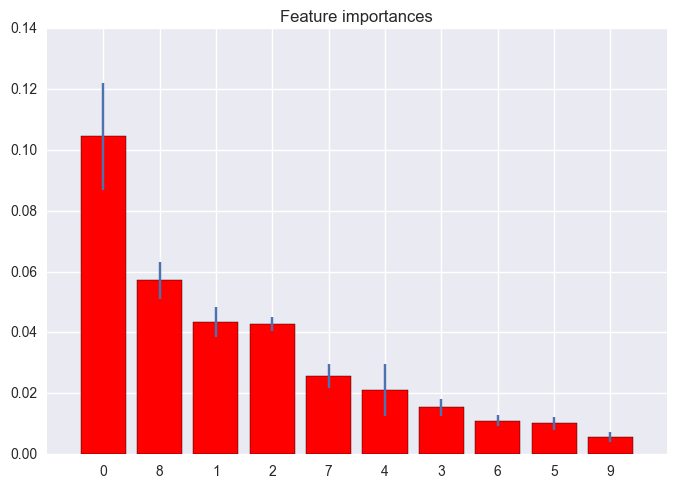

In [17]:
# Importances of features
train_index,test_index = train_test_split(df.index, random_state=4)

print (y[train_index])
print ("\n")

print (X[train_index])
print ("\n")


forest = RF()
forest_fit = forest.fit(X[train_index], y[train_index])


forest_predictions = forest_fit.predict(X[test_index])
print ("\n")

importances = forest_fit.feature_importances_[:10]
print (importances)
print ("\n")
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. %s (%f)" % (f + 1, df.columns[f], importances[indices[f]]))

# Plot the feature importances of the forest
#import pylab as pl
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices], yerr=std[indices], color="r", align="center")
plt.xticks(range(10), indices)
plt.xlim([-1, 10])
plt.show()

In [18]:
print "~ Transforming Data ~"
scaler = StandardScaler()
X = scaler.fit_transform(X)
print "Feature space holds %d observations and %d features" % X.shape
print "Unique target labels:", np.unique(y)

~ Transforming Data ~
Feature space holds 31752 observations and 80 features
Unique target labels: [0 1]


In [19]:
print "~ Building K-Fold Cross-Validations ~"
def run_cv(X, y, clf):
    # construct a K-Fold object
    kf = KFold(n_splits=5, shuffle=True, random_state=4)
    y_pred = y.copy()
    
    # iterate through folds
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf.fit(X_train, y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

~ Building K-Fold Cross-Validations ~


In [20]:
print "~ Evaluating Models ~"    
def accuracy(y_true,y_pred):
    return np.mean(y_true == y_pred)

print "Logistic Regression:"
print "Accuracy = %.3f" % accuracy(y, run_cv(X,y,LR()))
print "Gradient Boosting Classifier:"
print "Accuracy = %.3f" % accuracy(y, run_cv(X,y,GBC()))
print "Support vector machines:"
print "Accuracy = %.3f" % accuracy(y, run_cv(X,y,SVC()))
print "Random forest:"
print "Accuracy = %.3f" % accuracy(y, run_cv(X,y,RF()))
print "K-nearest-neighbors:"
print "Accuracy = %.3f" % accuracy(y, run_cv(X,y,KNN()))

~ Evaluating Models ~
Logistic Regression:
Accuracy = 0.648
Gradient Boosting Classifier:
Accuracy = 0.703
Support vector machines:
Accuracy = 0.671
Random forest:
Accuracy = 0.667
K-nearest-neighbors:
Accuracy = 0.631


Logisitic Regression F1 Score 0.668543154277
Gradient Boosting Classifier F1 Score 0.705493339988
Support Vector Machines F1 Score 0.680080729007
Random Forest F1 Score 0.64074893617
K-Nearest-Neighbors F1 Score 0.627762255525


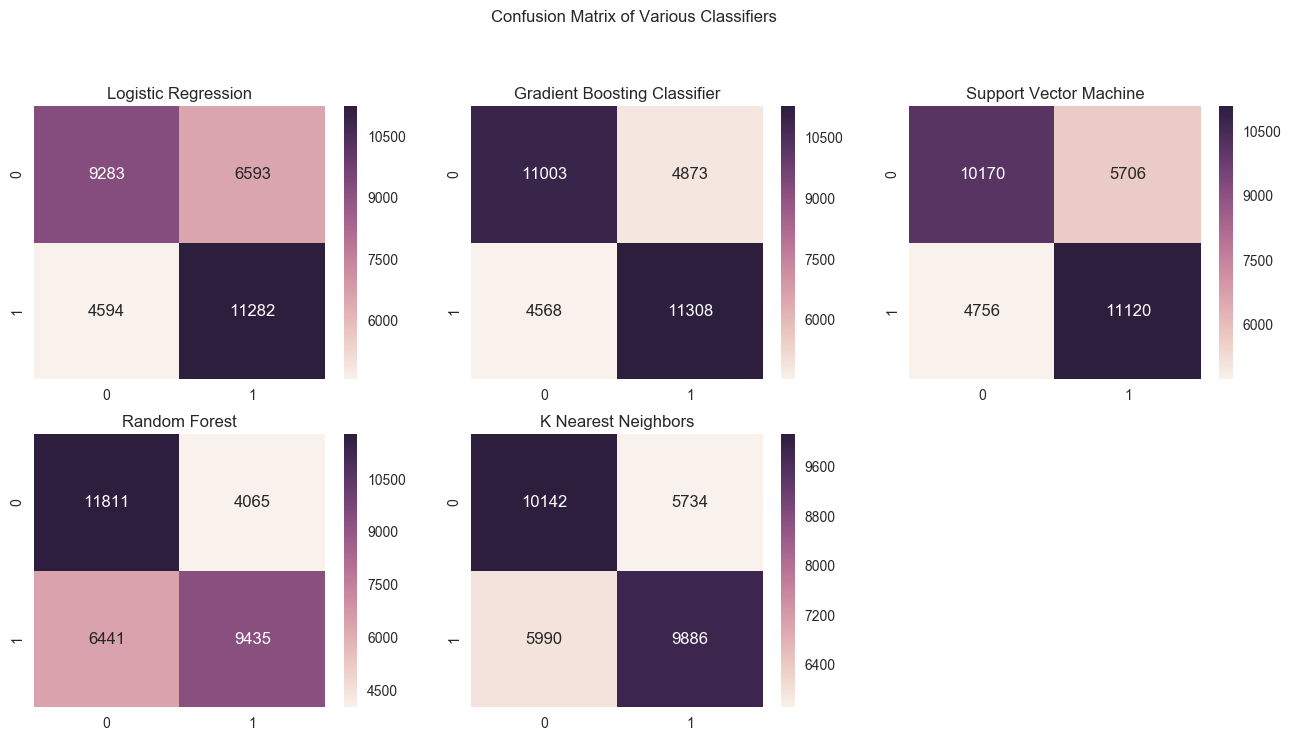

In [21]:
# F1-Scores and Confusion Matrices
def draw_confusion_matrices(confusion_matricies,class_names):
    class_names = class_names.tolist()
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        print(cm)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)

        cax = ax.matshow(cm)
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    
y = np.array(y)
class_names = np.unique(y)


confusion_matrices = {
                1: {
                    'matrix': confusion_matrix(y,run_cv(X,y,LR())),
                    'title': 'Logistic Regression',
                   },
                2: {
                    'matrix': confusion_matrix(y,run_cv(X,y,GBC())),
                    'title': 'Gradient Boosting Classifier',
                   },
                3: {
                    'matrix': confusion_matrix(y,run_cv(X,y,SVC())),
                    'title': 'Support Vector Machine',
                   },
                4: {
                    'matrix': confusion_matrix(y,run_cv(X,y,RF())),
                    'title': 'Random Forest',
                   },
                5: {
                    'matrix': confusion_matrix(y,run_cv(X,y,KNN())),
                    'title': 'K Nearest Neighbors',
                   },
}



fix, ax = plt.subplots(figsize=(16, 12))
plt.suptitle('Confusion Matrix of Various Classifiers')
for ii, values in confusion_matrices.items():
    matrix = values['matrix']
    title = values['title']
    plt.subplot(3, 3, ii) # starts from 1
    plt.title(title);
    sns.heatmap(matrix, annot=True,  fmt='');
    
print  "Logisitic Regression F1 Score" ,f1_score(y,run_cv(X,y,LR()))
print  "Gradient Boosting Classifier F1 Score" ,f1_score(y,run_cv(X,y,GBC()))
print  "Support Vector Machines F1 Score" ,f1_score(y,run_cv(X,y,SVC()))
print  "Random Forest F1 Score" ,f1_score(y,run_cv(X,y,RF()))
print  "K-Nearest-Neighbors F1 Score" ,f1_score(y,run_cv(X,y,KNN()))   

Logisitic Regression:


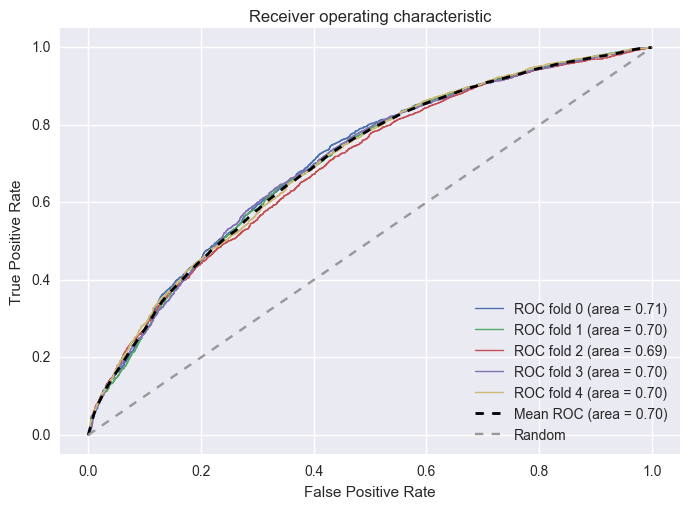

Gradient Boosting Classifier:


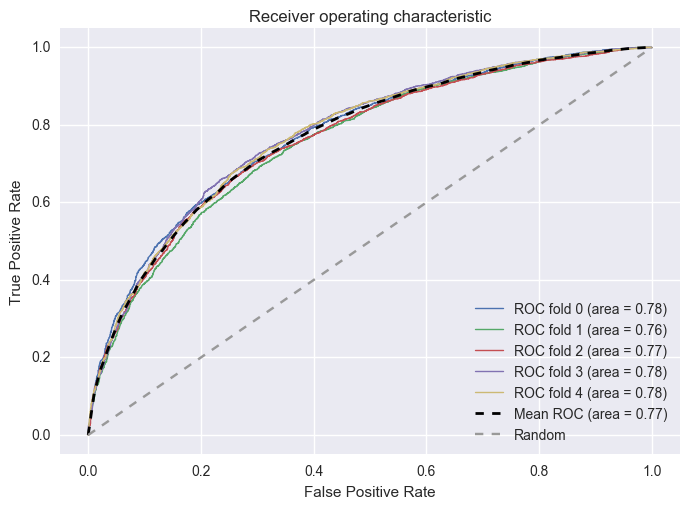

Support vector machines:


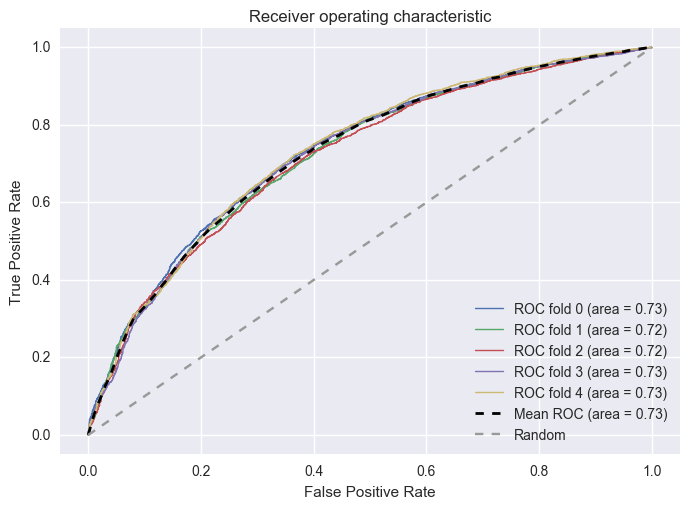

Random forests:


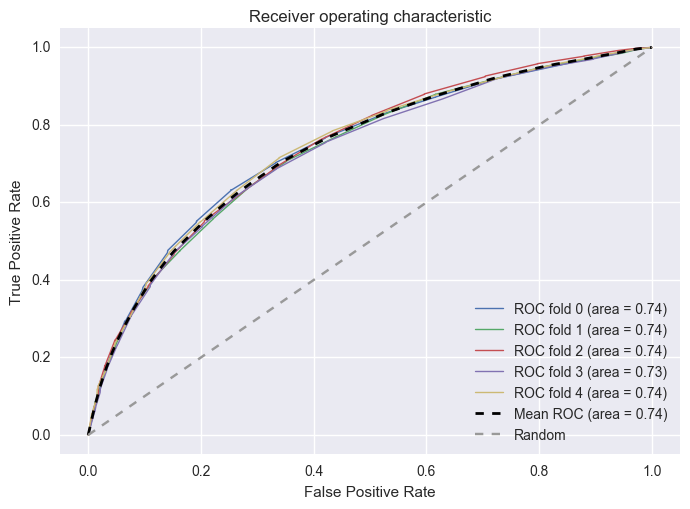

K-nearest-neighbors:


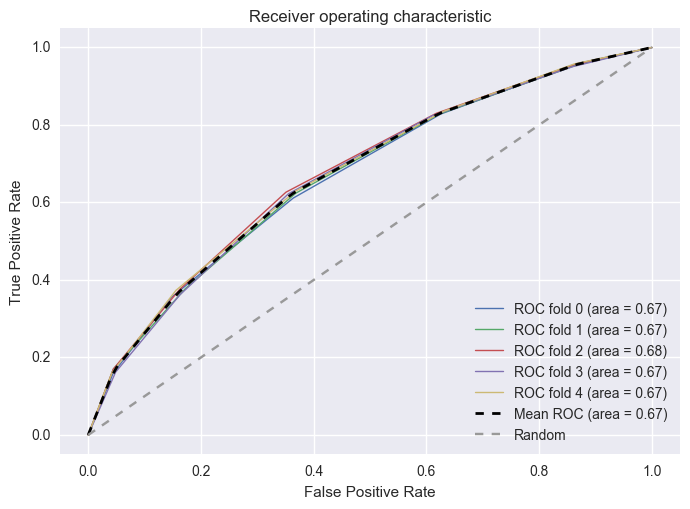

In [22]:
# ROC plots
def plot_roc(X, y, clf_class):
    kf = KFold(n_splits=5,shuffle=True, random_state=4)
    y_prob = np.zeros((len(y),2))
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
#    all_tpr = []
    i = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class
        clf.fit(X_train,y_train)
        # Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y[test_index], y_prob[test_index, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
        i = i + 1
    mean_tpr /= kf.get_n_splits(X)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
    
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
print "Logisitic Regression:"
plot_roc(X,y,LR())    
      
print "Gradient Boosting Classifier:"
plot_roc(X,y,GBC())

print "Support vector machines:"
plot_roc(X,y,SVC(probability=True))

print "Random forests:"
plot_roc(X,y,RF(n_estimators=18))

print "K-nearest-neighbors:"
plot_roc(X,y,KNN())

In [23]:


print "~ Building K-Fold Cross-Validations with Probabilities ~"
def run_prob_cv(X, y, clf):
    kf = KFold(n_splits=5,shuffle=True, random_state=4)
    y_prob = np.zeros((len(y),2))
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf.fit(X_train,y_train)
        # Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
    return y_prob



~ Building K-Fold Cross-Validations with Probabilities ~


In [24]:


print "~ Calculating Calibration and Discrimination ~"
# Take on RF
pred_prob = run_prob_cv(X, y, RF(n_estimators=10, random_state=4))

# Use 10 estimators so predictions are all multiples of 0.1
pred_churn = pred_prob[:,1].round(1)
is_churn = y == 1

# Number of times a predicted probability is assigned to an observation
counts = pd.value_counts(pred_churn)
counts[:]

print "~ Done Calculating Calibration and Discrimination ~"


~ Calculating Calibration and Discrimination ~
~ Done Calculating Calibration and Discrimination ~


In [25]:
# calculate true probabilities
print "~ Calculating the true probabilities ~"
true_prob = {}
for prob in counts.index:
    true_prob[prob] = np.mean(is_churn[pred_churn == prob])
    true_prob = pd.Series(true_prob)

counts = pd.concat([counts,true_prob], axis=1).reset_index()
counts.columns = ['pred_prob', 'count', 'true_prob']
counts.sort_values('pred_prob').reset_index().drop(['index'], axis=1)
print "~ Done calculating the true probabilities ~"


~ Calculating the true probabilities ~
~ Done calculating the true probabilities ~


In [26]:
baseline = np.mean(is_churn)
print "~ Done ~"


~ Done ~


In [27]:
def calibration(prob,outcome,n_bins=10):
#    """Calibration measurement for a set of predictions.
#    When predicting events at a given probability, how far is frequency
#    of positive outcomes from that probability?
#    NOTE: Lower scores are better
#    prob: array_like, float
#        Probability estimates for a set of events
#    outcome: array_like, bool
#        If event predicted occurred
#    n_bins: int
#        Number of judgement categories to prefrom calculation over.
#        Prediction are binned based on probability, since "descrete" 
#        probabilities aren't required. 
#    """
    prob = np.array(prob)
    outcome = np.array(outcome)

    c = 0.0
    # Construct bins
    judgement_bins = np.arange(n_bins + 1) / n_bins
    # Which bin is each prediction in?
    bin_num = np.digitize(prob,judgement_bins)
    for j_bin in np.unique(bin_num):
        # Is event in bin
        in_bin = bin_num == j_bin
        # Predicted probability taken as average of preds in bin
        predicted_prob = np.mean(prob[in_bin])
        # How often did events in this bin actually happen?
        true_bin_prob = np.mean(outcome[in_bin])
        # Squared distance between predicted and true times num of obs
        c += np.sum(in_bin) * ((predicted_prob - true_bin_prob) ** 2)
    return c / len(prob)

def discrimination(prob,outcome,n_bins=10):
#    """Discrimination measurement for a set of predictions.
#    For each judgement category, how far from the base probability
#    is the true frequency of that bin?
#    NOTE: High scores are better
#    prob: array_like, float
#        Probability estimates for a set of events
#    outcome: array_like, bool
#        If event predicted occurred
#    n_bins: int
#        Number of judgement categories to prefrom calculation over.
#        Prediction are binned based on probability, since "descrete" 
#        probabilities aren't required. 
#    """
    prob = np.array(prob)
    outcome = np.array(outcome)

    d = 0.0
    # Base frequency of outcomes
    base_prob = np.mean(outcome)
    # Construct bins
    judgement_bins = np.arange(n_bins + 1) / n_bins
    # Which bin is each prediction in?
    bin_num = np.digitize(prob,judgement_bins)
    for j_bin in np.unique(bin_num):
        in_bin = bin_num == j_bin
        true_bin_prob = np.mean(outcome[in_bin])
        # Squared distance between true and base times num of obs
        d += np.sum(in_bin) * ((true_bin_prob - base_prob) ** 2)
    return d / len(prob)

def print_measurements(pred_prob):
#    """
#    Print calibration error and discrimination
#    """
    churn_prob, is_churn = pred_prob[:,1], y == 1
    print("  %-20s %.4f" % ("Calibration Error", calibration(churn_prob, is_churn)))
    print("  %-20s %.4f" % ("Discrimination", discrimination(churn_prob,is_churn)))
    print("Note -- Lower calibration is better, higher discrimination is better")

In [28]:
def print_measurements(pred_prob):
    churn_prob, is_churn = pred_prob[:,1], y == 1
    print "  %-20s %.4f" % ("Calibration Error", calibration(churn_prob, is_churn))
    print "  %-20s %.4f" % ("Discrimination", discrimination(churn_prob,is_churn))

print "Note -- Lower calibration is better, higher discrimination is better"
print "\nLogistic Regression:"
print_measurements(run_prob_cv(X,y,LR()))

print "\nGradient Boosting Classifier:"
print_measurements(run_prob_cv(X,y,GBC()))

print "\nSupport vector machines:"
print_measurements(run_prob_cv(X,y,SVC(probability=True)))

print "\nRandom forests:"
print_measurements(run_prob_cv(X,y,RF(n_estimators=18)))

print "\nK-nearest-neighbors:"
print_measurements(run_prob_cv(X,y,KNN()))

Note -- Lower calibration is better, higher discrimination is better

Logistic Regression:
  Calibration Error    0.0005
  Discrimination       0.0299

Gradient Boosting Classifier:
  Calibration Error    0.0004
  Discrimination       0.0544

Support vector machines:
  Calibration Error    0.0006
  Discrimination       0.0377

Random forests:
  Calibration Error    0.0023
  Discrimination       0.0425

K-nearest-neighbors:
  Calibration Error    0.0189
  Discrimination       0.0236


In [29]:
print '~ Profit Curves ~'
def confusion_rates(cm): 

    tn = cm[0][0]
    fp = cm[0][1] 
    fn = cm[1][0]
    tp = cm[1][1]
    
    N = fp + tn
    P = tp + fn
    
    tpr = tp / P
    fpr = fp / P
    fnr = fn / N
    tnr = tn / N
    
    rates = np.array([[tpr, fpr], [fnr, tnr]])
    
    return rates


def profit_curve(classifiers):
    for clf_class in classifiers:
        name, clf_class = clf_class[0], clf_class[1]
        clf = clf_class
        fit = clf.fit(X[train_index], y[train_index])
        probabilities = np.array([prob[0] for prob in fit.predict_proba(X[test_index])])
        profit = []
        
        indicies = np.argsort(probabilities)[::1]
    
        for idx in xrange(len(indicies)): 
            pred_true = indicies[:idx]
            ctr = np.arange(indicies.shape[0])
            masked_prediction = np.in1d(ctr, pred_true)
            cm = confusion_matrix(y_test.astype(int), masked_prediction.astype(int))
            rates = confusion_rates(cm)
     
            profit.append(np.sum(np.multiply(rates,cb)))
        
        plt.plot((np.arange(len(indicies)) / len(indicies) * 100), profit, label=name)
    plt.legend(loc="lower right")
    plt.title("Profits of classifiers")
    plt.xlabel("Percentage of test instances (decreasing by score)")
    plt.ylabel("Profit")
    plt.show()

~ Profit Curves ~


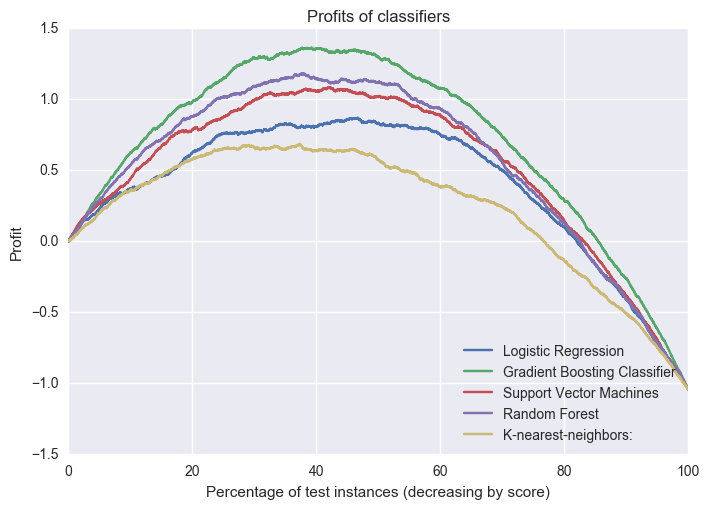

In [30]:
y_test = y[test_index].astype(float)

# Cost-Benefit Matrix
cb = np.array([[4, -5],
               [0, 0]])

# Define classifiers for comparison
classifiers = [("Logistic Regression",LR()),
               ("Gradient Boosting Classifier", GBC()),
               ("Support Vector Machines",SVC(probability=True)),
               ("Random Forest", RF(n_estimators=18)),
               ("K-nearest-neighbors:", KNN())
              ]
               
# Plot profit curves
profit_curve(classifiers)

In [31]:


forest = RF(n_estimators=18, random_state=4)
forest_fit = forest.fit(X[train_index], y[train_index])
predictions = forest_fit.predict(X[test_index])

print confusion_matrix(y[test_index],predictions)
print accuracy_score(y[test_index],predictions)
print classification_report(y[test_index],predictions)



[[2899 1087]
 [1481 2471]]
0.67649281935
             precision    recall  f1-score   support

          0       0.66      0.73      0.69      3986
          1       0.69      0.63      0.66      3952

avg / total       0.68      0.68      0.68      7938



In [32]:
# Grid Search and Hyper Parameters
rfc = RF(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True, random_state = 4) 

param_grid = { 
    'n_estimators': [5, 10, 20, 40, 80, 160, 200],
    #'min_samples_leaf': [1, 5, 10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X[train_index], y[train_index])

means = CV_rfc.cv_results_['mean_test_score']
stds = CV_rfc.cv_results_['std_test_score']

print("Best: %f using %s with %s" % (CV_rfc.best_score_, CV_rfc.best_params_, CV_rfc.best_estimator_))
for params, mean_score, scores in zip(CV_rfc.cv_results_['params'],means,stds):
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.698161 using {'max_features': 'auto', 'n_estimators': 200} with RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=4, verbose=0, warm_start=False)
0.005984 (0.000000) with: {'max_features': 'auto', 'n_estimators': 5}
0.004937 (0.000000) with: {'max_features': 'auto', 'n_estimators': 10}
0.006798 (0.000000) with: {'max_features': 'auto', 'n_estimators': 20}
0.006464 (0.000000) with: {'max_features': 'auto', 'n_estimators': 40}
0.006481 (0.000000) with: {'max_features': 'auto', 'n_estimators': 80}
0.006108 (0.000000) with: {'max_features': 'auto', 'n_estimators': 160}
0.004646 (0.000000) with: {'max_features': 'auto', 'n_estimators': 200}
0.005984 (0.000000) wit

[[2896 1090]
 [1272 2680]]
0.702443940539
             precision    recall  f1-score   support

          0       0.69      0.73      0.71      3986
          1       0.71      0.68      0.69      3952

avg / total       0.70      0.70      0.70      7938

Random forests senstivity analysis Train Data:


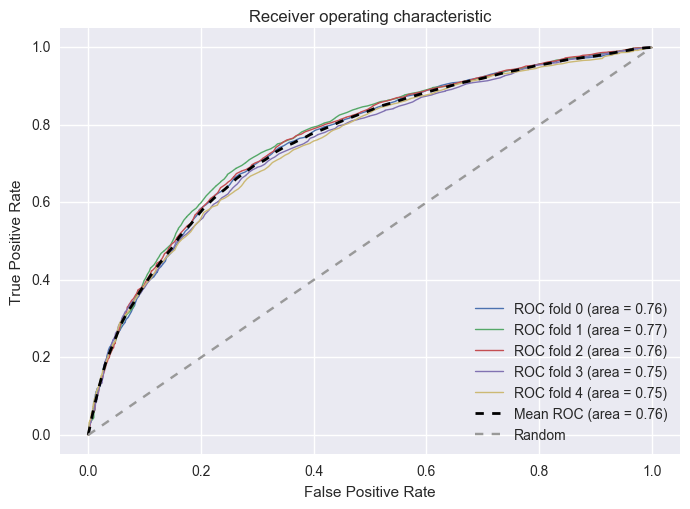

Random forests senstivity analysis Test Data:


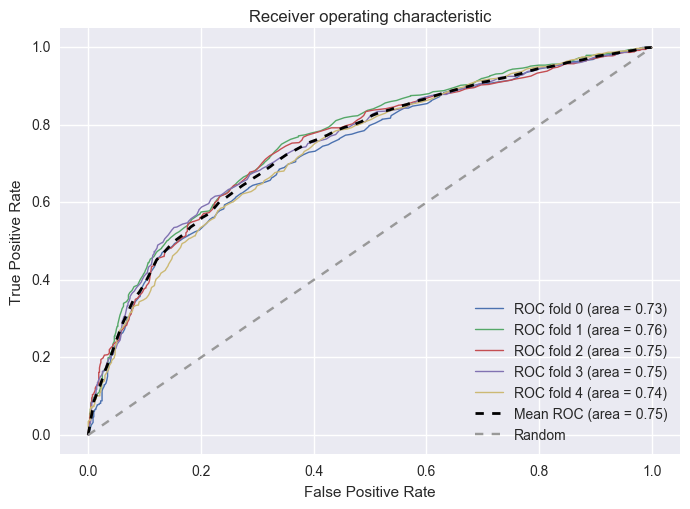

In [33]:
forest = CV_rfc.best_estimator_
forest_fit = forest.fit(X[train_index], y[train_index])
predictions = forest_fit.predict(X[test_index])

print confusion_matrix(y[test_index],predictions)
print accuracy_score(y[test_index],predictions)
print classification_report(y[test_index],predictions)

print "Random forests senstivity analysis Train Data:"
plot_roc(X[train_index],y[train_index],CV_rfc.best_estimator_)
print "Random forests senstivity analysis Test Data:"
plot_roc(X[test_index],y[test_index],CV_rfc.best_estimator_)

~ Threshold Value ~


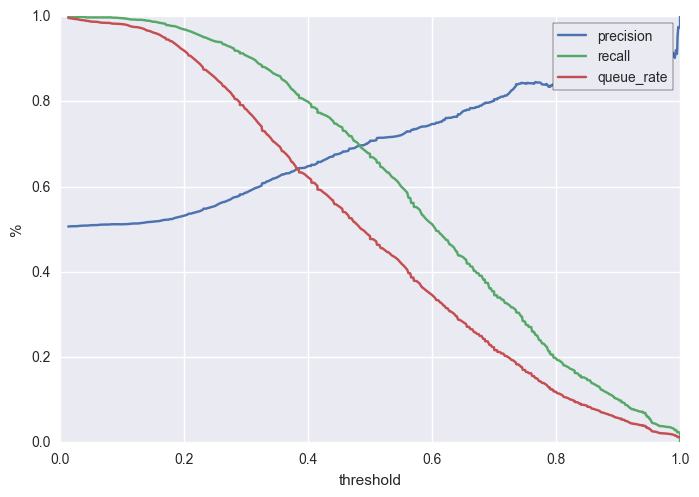

In [34]:
print "~ Threshold Value ~"
clf = CV_rfc.best_estimator_

n_trials = 50
test_size_percent = 0.1

signals = X
labels = y

plot_data = []

train_signals, test_signals, train_labels, test_labels = train_test_split(signals, labels, test_size=test_size_percent)
clf.fit(train_signals, train_labels)
predictions = clf.predict_proba(test_signals)[:,1]

precision, recall, thresholds = precision_recall_curve(test_labels, predictions)
thresholds = np.append(thresholds, 1)

queue_rate = []
for threshold in thresholds:
    queue_rate.append((predictions >= threshold).mean())
    
plt.plot(thresholds, precision, color=sns.color_palette()[0])
plt.plot(thresholds, recall, color=sns.color_palette()[1])
plt.plot(thresholds, queue_rate, color=sns.color_palette()[2])

leg = plt.legend(('precision', 'recall', 'queue_rate'), frameon=True)
leg.get_frame().set_edgecolor('k')
plt.xlabel('threshold')
plt.ylabel('%')

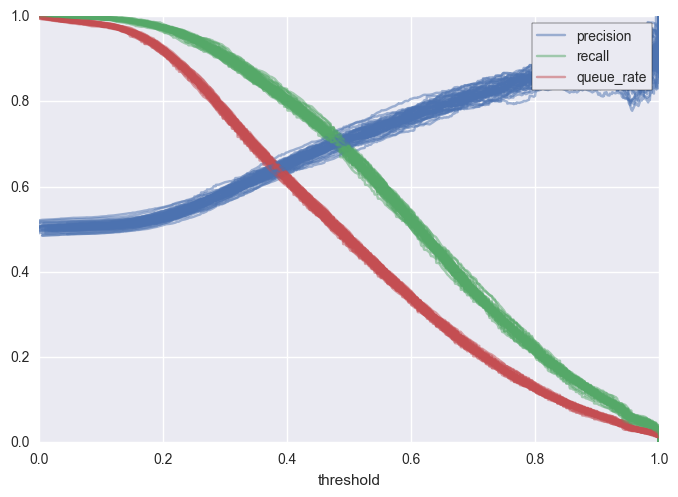

In [35]:
clf = CV_rfc.best_estimator_

n_trials = 50
test_size_percent = 0.1

signals = X
labels = y

plot_data = []

for trial in range(n_trials):
    train_signals, test_signals, train_labels, test_labels = train_test_split(signals, labels, test_size=test_size_percent)
    clf.fit(train_signals, train_labels)
    predictions = clf.predict_proba(test_signals)[:,1]
    
    precision, recall, thresholds = precision_recall_curve(test_labels, predictions)
    thresholds = np.append(thresholds, 1)
    
    queue_rate = []
    for threshold in thresholds:
        queue_rate.append((predictions >= threshold).mean())
            
    plot_data.append({
            'thresholds': thresholds
        ,   'precision': precision
        ,   'recall': recall
        ,   'queue_rate': queue_rate
    })
#%%
for p in plot_data:
    plt.plot(p['thresholds'], p['precision'], color=sns.color_palette()[0], alpha=0.5)
    plt.plot(p['thresholds'], p['recall'], color=sns.color_palette()[1], alpha=0.5)
    plt.plot(p['thresholds'], p['queue_rate'], color=sns.color_palette()[2], alpha=0.5)
    
leg = plt.legend(('precision', 'recall', 'queue_rate'), frameon=True)
leg.get_frame().set_edgecolor('k')
plt.xlabel('threshold')

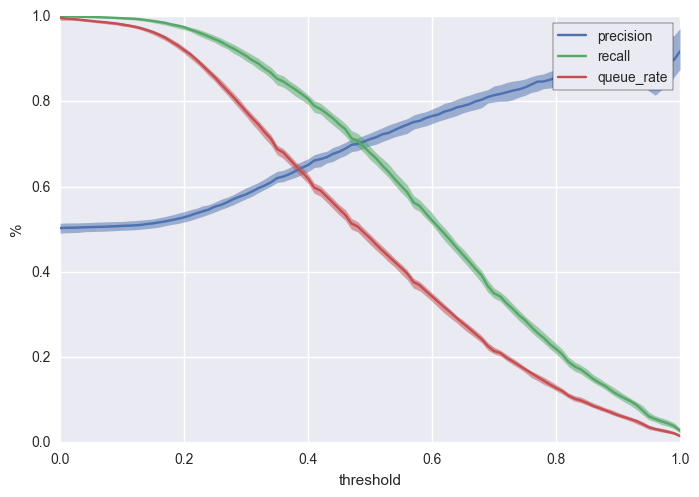

In [36]:
uniform_thresholds = np.linspace(0, 1, 101)

uniform_precision_plots = []
uniform_recall_plots= []
uniform_queue_rate_plots= []

for p in plot_data:
    uniform_precision = []
    uniform_recall = []
    uniform_queue_rate = []
    for ut in uniform_thresholds:
        index = bisect.bisect_left(p['thresholds'], ut)
        uniform_precision.append(p['precision'][index])
        uniform_recall.append(p['recall'][index])
        uniform_queue_rate.append(p['queue_rate'][index])
        
    uniform_precision_plots.append(uniform_precision)
    uniform_recall_plots.append(uniform_recall)
    uniform_queue_rate_plots.append(uniform_queue_rate)
#%%
quantiles = [0.1, 0.5, 0.9]
lower_precision, median_precision, upper_precision = mstats.mquantiles(uniform_precision_plots, quantiles, axis=0)
lower_recall, median_recall, upper_recall = mstats.mquantiles(uniform_recall_plots, quantiles, axis=0)
lower_queue_rate, median_queue_rate, upper_queue_rate = mstats.mquantiles(uniform_queue_rate_plots, quantiles, axis=0)

plt.plot(uniform_thresholds, median_precision)
plt.plot(uniform_thresholds, median_recall)
plt.plot(uniform_thresholds, median_queue_rate)

plt.fill_between(uniform_thresholds, upper_precision, lower_precision, alpha=0.5, linewidth=0, color=sns.color_palette()[0])
plt.fill_between(uniform_thresholds, upper_recall, lower_recall, alpha=0.5, linewidth=0, color=sns.color_palette()[1])
plt.fill_between(uniform_thresholds, upper_queue_rate, lower_queue_rate, alpha=0.5, linewidth=0, color=sns.color_palette()[2])

leg = plt.legend(('precision', 'recall', 'queue_rate'), frameon=True)
leg.get_frame().set_edgecolor('k')
plt.xlabel('threshold')
plt.ylabel('%')

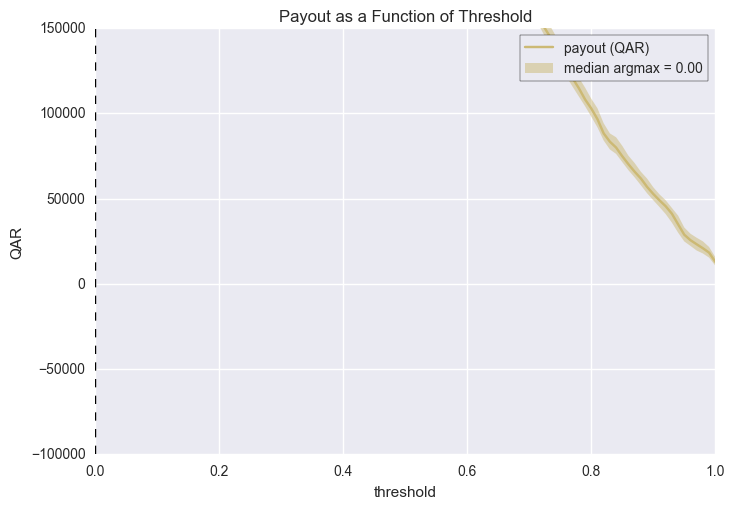

In [37]:
uniform_thresholds = np.linspace(0, 1, 101)

uniform_payout_plots = []

n = 10000
success_payoff = 4
case_cost = 5

for p in plot_data:
    uniform_payout = []
    for ut in uniform_thresholds:
        index = bisect.bisect_left(p['thresholds'], ut)
        precision = p['precision'][index]
        queue_rate = p['queue_rate'][index]
        
        payout = n*queue_rate*(precision*100 - case_cost)
        uniform_payout.append(payout)

    uniform_payout_plots.append(uniform_payout)

quantiles = [0.1, 0.5, 0.9]
lower_payout, median_payout, upper_payout = mstats.mquantiles(uniform_payout_plots, quantiles, axis=0)

plt.plot(uniform_thresholds, median_payout, color=sns.color_palette()[4])
plt.fill_between(uniform_thresholds, upper_payout, lower_payout, alpha=0.5, linewidth=0, color=sns.color_palette()[4])

max_ap = uniform_thresholds[np.argmax(median_payout)]
plt.vlines([max_ap], -100000, 150000, linestyles='--')
plt.ylim(-100000, 150000)

leg = plt.legend(('payout (QAR)', 'median argmax = {:.2f}'.format(max_ap)), frameon=True)
leg.get_frame().set_edgecolor('k')
plt.xlabel('threshold')
plt.title("Payout as a Function of Threshold")
plt.ylabel('QAR')

In [38]:
print np.max(median_payout)

450708.438287


In [44]:
# Scoring Model
def ChurnModel(df, clf):
    # Convert yes no columns to bool
    # yes_no_cols already known, stored as a global variable
    df[yes_no_cols] = df[yes_no_cols] == 'yes'
    # features already known, stored as a global variable
    X = df[features].as_matrix().astype(np.float)
    X = scaler.transform(X)
    
    """
    Calculates probability of churn and expected loss, 
    and gathers customer's contact info
    """     
    # Collect customer meta data
    response = df[['NATIONALITY','VF_NUMBER']]
    charges = ['REVENUE_INTL_IC','REVENUE_INTL_OG','MINS_TOTAL_IC','MINS_TOTAL_OG','ROAMING_MINS_IC','ROAMING_MINS_OG','ROAMING_DATA']
    response['customer_worth'] = df[charges].sum(axis=1)    
    
    # Make prediction
    churn_prob = clf.predict_proba(X)
    response['churn_prob'] = churn_prob[:,1]
    
    # Calculate expected loss
    response['expected_loss'] = response['churn_prob'] * response['customer_worth']
    response = response.sort('churn_prob', ascending=False)
    
    print ("\n~~ Export and Print Data ~~\n")

    response.to_csv('C:/Users/MoideenJ/Desktop/TelcoChurn/Input Churn Data/output-testing Oct data for Nov targets - 18 Nov.csv', sep=',', encoding='utf-8', index=False)

    
    # Return response DataFrame
    return response


print ("\n~~ done response ~~\n")



~~ done response ~~



In [45]:
# Simulated new data 
df = pd.read_csv('C:/Users/MoideenJ/Desktop/TelcoChurn/Input Churn Data/AcIc_Data_Oct_with ARPU-17 Nov_version16 - test data.csv',low_memory=False, header=0)

train_index,test_index = train_test_split(df.index, random_state = 4)
test_df = df.ix[test_index]

# Apply new data to the model
ChurnModel(test_df, CV_rfc.best_estimator_)




~~ Export and Print Data ~~



,NATIONALITY,VF_NUMBER,customer_worth,churn_prob,expected_loss
279298,Egyptian,97470216186,0.0,1.0,0.0
159449,Lebanese,97430305141,0.0,1.0,0.0
14182,South African,97474791864,0.0,1.0,0.0
102295,Egyptian,97477201919,0.0,1.0,0.0
30939,UAE (United Arab Emirates),97455865480,0.0,1.0,0.0
218609,Nepalese,97470706247,0.0,1.0,0.0
8250,Qatari,97431313831,0.0,1.0,0.0
242146,UAE (United Arab Emirates),97430585346,0.0,1.0,0.0
44927,Sri Lankan,97430595239,0.0,1.0,0.0
197468,Qatari,97477799105,0.0,1.0,0.0


In [46]:
#Evaluate the test data 

df = pd.read_csv('C:/Users/MoideenJ/Desktop/TelcoChurn/Input Churn Data/output-testing Oct data for Nov targets - 18 Nov.csv',low_memory=False, header=0)

print ("\n~~ Output Data Summary ~~\n")
print (df.shape)

print ("\n")

print (df.dtypes)

print ("\n")

print df.describe(include=['int64','float64'])

print ("\n")

print df.describe(include=['category','object'])

print ("\n")

print df.groupby(df['churn_prob']).mean()



~~ Output Data Summary ~~

(72628, 5)


NATIONALITY        object
VF_NUMBER           int64
customer_worth    float64
churn_prob        float64
expected_loss     float64
dtype: object


       VF_NUMBER  customer_worth  churn_prob  expected_loss
count  7.263e+04       72628.000   72628.000      72628.000
mean   9.746e+10         931.175       0.397        315.906
std    2.068e+07        1302.706       0.192        502.851
min    9.743e+10           0.000       0.000          0.000
25%    9.743e+10          68.737       0.255         27.604
50%    9.747e+10         590.520       0.360        180.542
75%    9.747e+10        1248.878       0.520        422.546
max    9.748e+10       35355.670       1.000      22863.333


       NATIONALITY
count        72628
unique         138
top         Indian
freq         17933


              VF_NUMBER  customer_worth  expected_loss
churn_prob                                            
0.000       97459318258           1.329          0.000
0.003    